In [18]:
import opendatasets as od
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
dataset_url = "https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset"
dataset_path = "plant-disease-recognition-dataset"

In [19]:
dataset_path = r"D:\project\Plant_Dieases_detect\plant-disease-recognition-dataset"

In [4]:
if not os.path.exists(dataset_path):
    od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset


100%|██████████| 1.25G/1.25G [00:11<00:00, 116MB/s] 


In [20]:
train_dir = os.path.join(dataset_path, "Train", "Train")
test_dir = os.path.join(dataset_path, "Test", "Test")
val_dir = os.path.join(dataset_path, "Validation", "Validation")

In [21]:
IMG_SIZE = 128

def load_data(data_dir):
    images, labels = [], []
    class_names = sorted(os.listdir(data_dir))

    for label, category in enumerate(class_names):
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels), class_names

In [22]:
X_train, y_train, class_names = load_data(train_dir)
X_test, y_test, _ = load_data(test_dir)
X_val, y_val, _ = load_data(val_dir)

In [23]:
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))
y_val = to_categorical(y_val, num_classes=len(class_names))

In [24]:
print("After to_categorical:")
print("y_train shape:", y_train.shape)
print("y_train sample:", y_train[1])

After to_categorical:
y_train shape: (1322, 3)
y_train sample: [1. 0. 0.]


In [25]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(X_train)

In [26]:
print(f"Training data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing data: {X_test.shape}, Labels: {y_test.shape}")
print(f"Validation data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Class Names: {class_names}")

Training data: (1322, 128, 128, 3), Labels: (1322, 3)
Testing data: (150, 128, 128, 3), Labels: (150, 3)
Validation data: (60, 128, 128, 3), Labels: (60, 3)
Class Names: ['Healthy', 'Powdery', 'Rust']


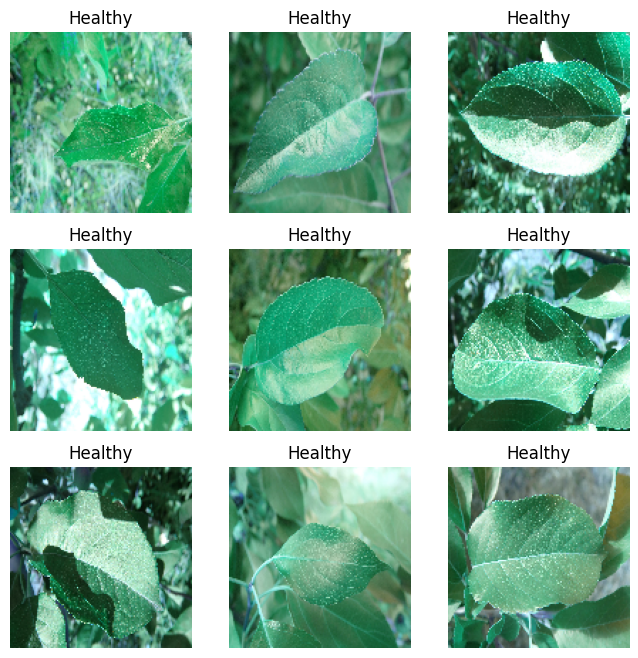

In [27]:
def plot_images(images, labels, class_names, num_images=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

plot_images(X_train, y_train, class_names)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # Output layer
])

model.summary()

d:\project\Plant_Dieases_detect\plant\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20
)

d:\project\Plant_Dieases_detect\plant\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 675ms/step - accuracy: 0.4440 - loss: 1.0599 - val_accuracy: 0.5000 - val_loss: 0.9377
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 735ms/step - accuracy: 0.6467 - loss: 0.7860 - val_accuracy: 0.6833 - val_loss: 0.6986
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 465ms/step - accuracy: 0.7700 - loss: 0.5862 - val_accuracy: 0.8500 - val_loss: 0.5945
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 444ms/step - accuracy: 0.8253 - loss: 0.4919 - val_accuracy: 0.8000 - val_loss: 0.5536
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 430ms/step - accuracy: 0.8124 - loss: 0.5170 - val_accuracy: 0.8167 - val_loss: 0.5286
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 512ms/step - accuracy: 0.8525 - loss: 0.4322 - val_accuracy: 0.8667 - val_loss: 0.5284
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 363ms/step - accuracy: 0.8714 - loss: 0.3915 - val_accuracy: 0.8667 - val_loss: 0.5374
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 417ms/step - accuracy: 0.8812 - loss: 0.3612 - val_accu

In [31]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9533 - loss: 0.2255
Test Accuracy: 0.9533


In [32]:
# Save the trained model
model.save("plant_disease_cnn.h5")

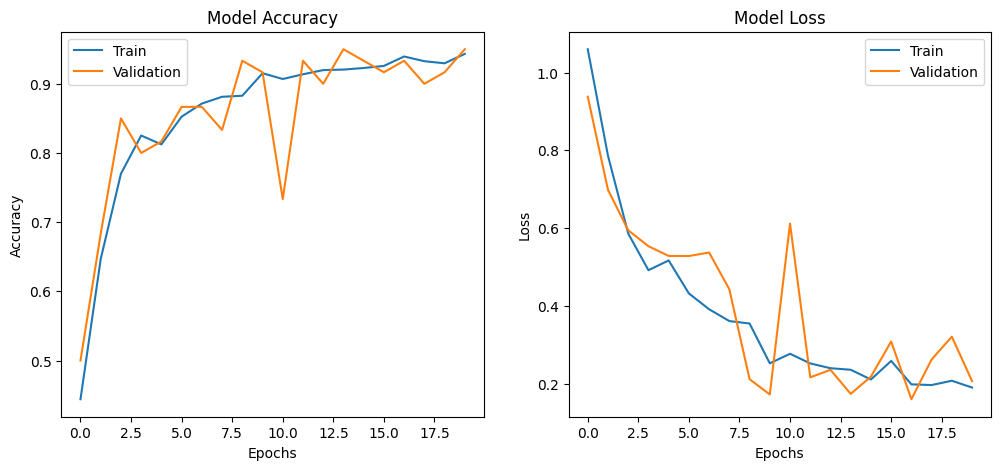

In [33]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    for i, metric in enumerate(["accuracy", "loss"]):
        plt.subplot(1, 2, i + 1)
        plt.plot(history.history[metric], label="Train")
        plt.plot(history.history[f"val_{metric}"], label="Validation")
        plt.xlabel("Epochs")
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.title(f"Model {metric.capitalize()}")

    plt.show()

plot_training_curves(history)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


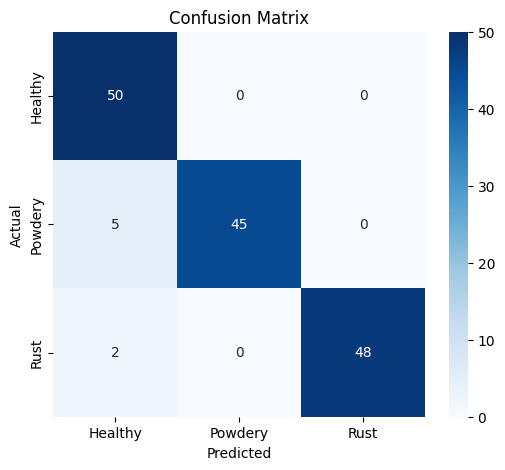

              precision    recall  f1-score   support

     Healthy       0.88      1.00      0.93        50
     Powdery       1.00      0.90      0.95        50
        Rust       1.00      0.96      0.98        50

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict on test data
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))
